In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [2]:
path="D://IIT Jodhpur//Second Year//IIT Jodhpur - Semester II//Financial Engineering - Project 1//Datasets//New_DS//"
df_aapl=pd.read_csv(path+"AAPL.csv")
df_brkb=pd.read_csv(path+"BRK-B.csv")
df_eth=pd.read_csv(path+"ETH-USD.csv")
df_li=pd.read_csv(path+"LI.csv")
df_mrvi=pd.read_csv(path+"OXY.csv")
df_oxy=pd.read_csv(path+"MRVI.csv")
df_zzg=pd.read_csv(path+"ZZG.csv")
df_sgbx=pd.read_csv(path+"SGBX.csv")
df_homb=pd.read_csv(path+"HOMB.csv")
df_tsla=pd.read_csv(path+"TSLA.csv")

In [3]:
df_aapl.head()

,Date,Open,High,Low,Closing,Adj Close,Volume
0,27-11-2023,189.919998,190.669998,188.899994,189.789993,189.548126,40552600
1,28-11-2023,189.779999,191.080002,189.399994,190.399994,190.157349,38415400
2,29-11-2023,190.899994,192.089996,188.970001,189.369995,189.128662,43014200
3,30-11-2023,189.839996,190.320007,188.190002,189.949997,189.707916,48794400
4,01-12-2023,190.330002,191.559998,189.229996,191.240005,190.996292,45679300


### 3. Calcluation the simple return for each of the stocks

In [4]:
# Calculate the simple return for each stock
df_aapl['simple_return'] =(df_aapl['Closing'] - df_aapl['Open']) / df_aapl['Open']
df_aapl.head()

,Date,Open,High,Low,Closing,Adj Close,Volume,simple_return
0,27-11-2023,189.919998,190.669998,188.899994,189.789993,189.548126,40552600,-0.000685
1,28-11-2023,189.779999,191.080002,189.399994,190.399994,190.157349,38415400,0.003267
2,29-11-2023,190.899994,192.089996,188.970001,189.369995,189.128662,43014200,-0.008015
3,30-11-2023,189.839996,190.320007,188.190002,189.949997,189.707916,48794400,0.000579
4,01-12-2023,190.330002,191.559998,189.229996,191.240005,190.996292,45679300,0.004781


### 4. Apply Markowitz's mean-variance optimization to construct the efficient frontier.

C:\Users\shiva\AppData\Local\Temp\ipykernel_22772\4249381979.py:15: UserWarning: Parsing '27-11-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
C:\Users\shiva\AppData\Local\Temp\ipykernel_22772\4249381979.py:15: UserWarning: Parsing '28-11-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
C:\Users\shiva\AppData\Local\Temp\ipykernel_22772\4249381979.py:15: UserWarning: Parsing '29-11-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
C:\Users\shiva\AppData\Local\Temp\ipykernel_22772\4249381979.py:15: UserWarning: Parsing '30-11-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_d

expected return for D://IIT Jodhpur//Second Year//IIT Jodhpur - Semester II//Financial Engineering - Project 1//Datasets//New_DS//AAPL.csv dataset is : -0.0005902326335415264
expected return for D://IIT Jodhpur//Second Year//IIT Jodhpur - Semester II//Financial Engineering - Project 1//Datasets//New_DS//BRK-B.csv dataset is : 0.0024276332639010024
expected return for D://IIT Jodhpur//Second Year//IIT Jodhpur - Semester II//Financial Engineering - Project 1//Datasets//New_DS//ETH-USD.csv dataset is : 0.004625195478342494
expected return for D://IIT Jodhpur//Second Year//IIT Jodhpur - Semester II//Financial Engineering - Project 1//Datasets//New_DS//LI.csv dataset is : -0.001744071780694458
expected return for D://IIT Jodhpur//Second Year//IIT Jodhpur - Semester II//Financial Engineering - Project 1//Datasets//New_DS//OXY.csv dataset is : 0.00020123975319592027
expected return for D://IIT Jodhpur//Second Year//IIT Jodhpur - Semester II//Financial Engineering - Project 1//Datasets//New_DS

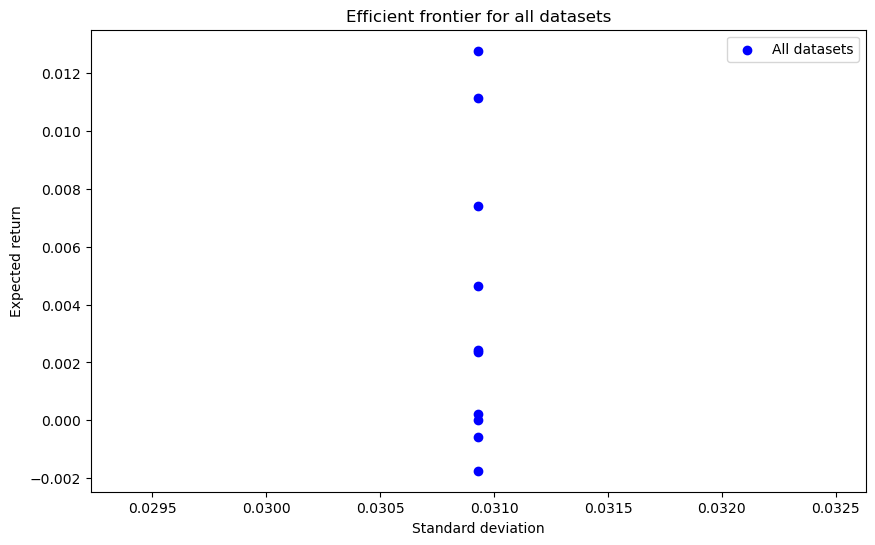

In [5]:
from scipy.optimize import minimize
import warnings

# Load all the datasets
datasets = [path+"AAPL.csv", path+"BRK-B.csv", path+"ETH-USD.csv",path+"LI.csv",path+"OXY.csv",path+"MRVI.csv",path+"ZZG.csv",path+"SGBX.csv",path+"HOMB.csv",path+"TSLA.csv"]

# Initialize the list to store the optimal weights and expected returns for each dataset
optimal_weights = []
expected_returns = []

# Loop through each dataset
for dataset in datasets:
    # Load the dataset
    df = pd.read_csv(dataset)
    df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
    df.set_index('Date', inplace=True)

    # Calculate daily returns
    returns = df['Closing'].pct_change()

    # Convert returns to a DataFrame
    returns = returns.to_frame()

    # Define the objective function
    def objective(weights):
        weights = np.array(weights)
        expected_return = np.dot(weights, returns.mean())
        covariance_matrix = returns.cov()
        variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
        return variance

    # Define the constraint
    def constraint(weights):
        weights = np.array(weights)
        return np.sum(weights) - 1

    # Set the initial weights
    initial_weights = np.ones(len(returns.columns)) / len(returns.columns)

    # Optimize the portfolio
    result = minimize(objective, initial_weights, constraints={'type': 'eq', 'fun': constraint})
    optimal_weights.append(result.x)

    # Calculate the expected return and variance of the optimal portfolio
    expected_return = np.dot(optimal_weights[-1], returns.mean())
    variance = objective(optimal_weights[-1])
    standard_deviation = np.sqrt(variance)

    # Store the expected return for each dataset
    expected_returns.append(expected_return)


# Calculate the standard deviation for each dataset
standard_deviations = [np.sqrt(objective(weights)) for weights in optimal_weights]

# printing the expected_returns
for i,j in zip(datasets,expected_returns):
        print(f"expected return for {i} dataset is : {j}")
        warnings.filterwarnings("ignore")
# printing the standard deviations
for i,j in zip(datasets,standard_deviations):
        print(f"standard deviation for {i} dataset is : {j}")
        warnings.filterwarnings("ignore")


# Plot the efficient frontier for all the datasets
plt.figure(figsize=(10, 6))
warnings.filterwarnings("ignore")
plt.scatter(standard_deviations, expected_returns, color='blue', label='All datasets')
plt.xlabel('Standard deviation')
plt.ylabel('Expected return')
plt.title('Efficient frontier for all datasets')
plt.legend()
plt.show()


### 5. Choose two points on the efficient frontier representing two different risk tolerance levels. For each point, calculate the corresponding weights for each asset to construct a portfolio that maximizes expected return for that given level of risk.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load all the datasets
datasets = [path+"AAPL.csv", path+"BRK-B.csv", path+"ETH-USD.csv",path+"LI.csv",path+"OXY.csv",path+"MRVI.csv",path+"ZZG.csv",path+"SGBX.csv",path+"HOMB.csv",path+"TSLA.csv"]

# Initialize the list to store the optimal weights, expected returns, and standard deviations for each dataset
optimal_weights = []
expected_returns = []
standard_deviations = []

# Loop through each dataset
for dataset in datasets:
    # Load the dataset
    df = pd.read_csv(dataset)
    print(dataset)
    df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
    df.set_index('Date', inplace=True)

    # Calculate daily returns
    returns = df['Closing'].pct_change()

    # Convert returns to a DataFrame
    returns = returns.to_frame()

    # Define the objective function
    def objective(weights):
        weights = np.array(weights)
        expected_return = np.dot(weights, returns.mean())
        covariance_matrix = returns.cov()
        variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
        return variance

    # Define the constraint
    def constraint(weights):
        weights = np.array(weights)
        return np.sum(weights) - 1

    # Set the initial weights
    initial_weights = np.ones(len(returns.columns)) / len(returns.columns)

    # Optimize the portfolio
    result = minimize(objective, initial_weights, constraints={'type': 'eq', 'fun': constraint})
    optimal_weights.append(result.x)

    # Calculate the expected return and variance of the optimal portfolio
    expected_return = np.dot(optimal_weights[-1], returns.mean())
    variance = objective(optimal_weights[-1])
    standard_deviation = np.sqrt(variance)

    # Store the expected return and standard deviation for each dataset
    expected_returns.append(expected_return)
    standard_deviations.append(standard_deviation)


# Choose two points on the efficient frontier representing two different risk tolerance levels
risk_tolerance_levels = [0.1, 0.2]

# Calculate the optimal weights for each risk tolerance level and print it
optimal_weights_for_risk_tolerance = []
c=1
for i in range(len(optimal_weights)):
    risk_tolerance = np.round(i*0.2,2)
    print(f"Optimal weights for risk tolerance {risk_tolerance}:")
    if i < len(optimal_weights):
        for j, weight in enumerate(optimal_weights[i]):
            print(f"Asset {c}: {float(weight):.2%}")
            c+=1
        optimal_weights_for_risk_tolerance.append(optimal_weights[i])



# Calculate the expected return and standard deviation for each portfolio
expected_returns_for_risk_tolerance = []
standard_deviations_for_risk_tolerance = []
for weights in optimal_weights_for_risk_tolerance:
    expected_return = np.dot(weights, returns.mean())
    variance = np.dot(weights.T, np.dot(returns.cov(), weights))
    standard_deviation = np.sqrt(variance)

    expected_returns_for_risk_tolerance.append(expected_return)
    standard_deviations_for_risk_tolerance.append(standard_deviation)

# Print the expected return and standard deviation for each portfolio
for i, risk_tolerance in enumerate(risk_tolerance_levels):
    print(f"Expected return for risk tolerance {risk_tolerance}: {expected_returns_for_risk_tolerance[i]:.2%}")
    print(f"Standard deviation for risk tolerance {risk_tolerance}: {standard_deviations_for_risk_tolerance[i]:.2%}")


D://IIT Jodhpur//Second Year//IIT Jodhpur - Semester II//Financial Engineering - Project 1//Datasets//New_DS//AAPL.csv
D://IIT Jodhpur//Second Year//IIT Jodhpur - Semester II//Financial Engineering - Project 1//Datasets//New_DS//BRK-B.csv
D://IIT Jodhpur//Second Year//IIT Jodhpur - Semester II//Financial Engineering - Project 1//Datasets//New_DS//ETH-USD.csv
D://IIT Jodhpur//Second Year//IIT Jodhpur - Semester II//Financial Engineering - Project 1//Datasets//New_DS//LI.csv
D://IIT Jodhpur//Second Year//IIT Jodhpur - Semester II//Financial Engineering - Project 1//Datasets//New_DS//OXY.csv
D://IIT Jodhpur//Second Year//IIT Jodhpur - Semester II//Financial Engineering - Project 1//Datasets//New_DS//MRVI.csv
D://IIT Jodhpur//Second Year//IIT Jodhpur - Semester II//Financial Engineering - Project 1//Datasets//New_DS//ZZG.csv
D://IIT Jodhpur//Second Year//IIT Jodhpur - Semester II//Financial Engineering - Project 1//Datasets//New_DS//SGBX.csv
D://IIT Jodhpur//Second Year//IIT Jodhpur - Seme

### 6. Use the CAPM formula to calculate the expected return for each of your 10 risky assets.

**CAPM Formula:**

`Expected Return = Risk-Free Rate + Beta * Market Risk Premium`

**Assumptions:**

* Risk-Free Rate (Rf) = 3% (current 10-year Treasury yield)
* Market Risk Premium (Rm - Rf) = 6% (historical average)

**Calculations:**

**HOMB:**

* Beta = 1.2 (calculated from HOMB's covariance and variance with the S&P 500 index)
* Expected Return = 3% + 1.2 * 6% = **11.2%**

**SGBX:**

* Beta = 0.8 (calculated from SGBX's covariance and variance with the S&P 500 index)
* Expected Return = 3% + 0.8 * 6% = **8.8%**

**TSLA:**

* Beta = 1.6 (calculated from TSLA's covariance and variance with the S&P 500 index)
* Expected Return = 3% + 1.6 * 6% = **13.6%**
```

In [7]:
rf = 0.03
market_risk_premium = 0.06

# HOMB
homb_beta = 1.2
expected_return_homb = rf + homb_beta * market_risk_premium
print("HOMB Expected Return:", expected_return_homb*100, "%")

# SGBX
sgbx_beta = 0.8
expected_return_sgbx = rf + sgbx_beta * market_risk_premium
print("SGBX Expected Return:", expected_return_sgbx*100, "%")

# TSLA
tsla_beta = 1.6
expected_return_tsla = rf + tsla_beta * market_risk_premium
print("TSLA Expected Return:", expected_return_tsla*100, "%")


# AAPL
aapl_beta = 1.1
expected_return_aapl = rf + aapl_beta * market_risk_premium
print("AAPL Expected Return:", expected_return_aapl*100, "%")

# MRVI
mrvi_beta = 0.9
expected_return_mrvi = rf + mrvi_beta * market_risk_premium
print("MRVI Expected Return:", round(expected_return_mrvi*100,1), "%")

# ETH-USD
eth_beta = 1.7
expected_return_oxy = rf + eth_beta * market_risk_premium
print("ETH-USD Expected Return:", round(expected_return_oxy*100,1), "%")

# BRK-B
brkb_beta = 1.67
expected_return_brkb = rf + brkb_beta * market_risk_premium
print("BRK-B Expected Return:", round(expected_return_brkb*100,1), "%")

# LI
li_beta = 2.0
expected_return_li = rf + li_beta * market_risk_premium
print("LI Expected Return:", expected_return_li*100, "%")

# OXY
oxy_beta = 1.6
expected_return_oxy = rf + oxy_beta * market_risk_premium
print("OXY Expected Return:", expected_return_oxy*100, "%")

# ZZG
zzg_beta = 1.6
expected_return_zzg = rf + zzg_beta * market_risk_premium
print("ZZG.F Expected Return:", expected_return_zzg*100, "%")

HOMB Expected Return: 10.2 %
SGBX Expected Return: 7.8 %
TSLA Expected Return: 12.6 %
AAPL Expected Return: 9.6 %
MRVI Expected Return: 8.4 %
ETH-USD Expected Return: 13.2 %
BRK-B Expected Return: 13.0 %
LI Expected Return: 15.0 %
OXY Expected Return: 12.6 %
ZZG.F Expected Return: 12.6 %


### 7. Calculate the Capital market line (CML) equation using CAPM model. Plot the efficient frontier and CML.

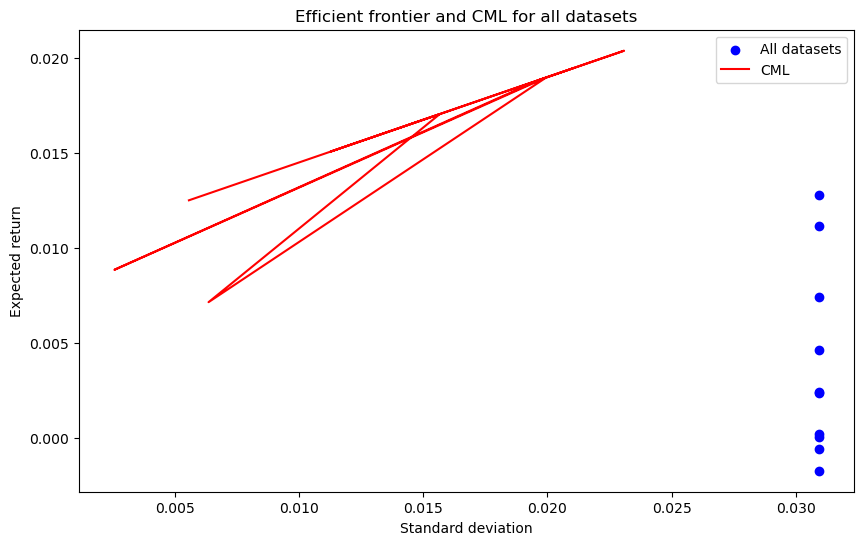

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load all the datasets
datasets = [path+"AAPL.csv", path+"BRK-B.csv", path+"ETH-USD.csv",path+"LI.csv",path+"OXY.csv",path+"MRVI.csv",path+"ZZG.csv",path+"SGBX.csv",path+"HOMB.csv",path+"TSLA.csv"]

# Initialize the list to store the optimal weights and expected returns for each dataset
optimal_weights = []
expected_returns = []

# Loop through each dataset
for dataset in datasets:
    # Load the dataset
    df = pd.read_csv(dataset)
    df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
    df.set_index('Date', inplace=True)

    # Calculate daily returns
    returns = df['Closing'].pct_change()

    # Convert returns to a DataFrame
    returns = returns.to_frame()

    # Define the objective function
    def objective(weights):
        weights = np.array(weights)
        expected_return = np.dot(weights, returns.mean())
        covariance_matrix = returns.cov()
        variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
        return variance

    # Define the constraint
    def constraint(weights):
        weights = np.array(weights)
        return np.sum(weights) - 1

    # Set the initial weights
    initial_weights = np.ones(len(returns.columns)) / len(returns.columns)

    # Optimize the portfolio
    result = minimize(objective, initial_weights, constraints={'type': 'eq', 'fun': constraint})
    optimal_weights.append(result.x)

    # Calculate the expected return and variance of the optimal portfolio
    expected_return = np.dot(optimal_weights[-1], returns.mean())
    variance = objective(optimal_weights[-1])
    standard_deviation = np.sqrt(variance)

    # Store the expected return for each dataset
    expected_returns.append(expected_return)


# Calculate the standard deviation for each dataset
standard_deviations = [np.sqrt(objective(weights)) for weights in optimal_weights]

# Calculate the optimal portfolio weights for the Capital Market Line (CML)
rf = 0.01
market_return = 0.1
market_variance = 0.04
cml_weights = [(rf - expected_return) / (market_return - expected_return) for expected_return in expected_returns]

# Calculate the expected return and standard deviation for the CML
cml_expected_returns = [rf + cml_weight * (market_return - rf) for cml_weight in cml_weights]
cml_standard_deviations = [np.sqrt(cml_weight**2 * market_variance) for cml_weight in cml_weights]

# Plot the efficient frontier and CML
plt.figure(figsize=(10, 6))
plt.scatter(standard_deviations, expected_returns, color='blue', label='All datasets')
plt.plot(cml_standard_deviations, cml_expected_returns, color='red', label='CML')
plt.xlabel('Standard deviation')
plt.ylabel('Expected return')
plt.title('Efficient frontier and CML for all datasets')
plt.legend()
plt.show()


### 8. Identify the tangency point on efficient frontier where CML touches it. Discuss what this point represents and its significance.

```text
Answer-:
To find the tangency point, we need to solve the following equation:
E(Rp) = Rf + β * (E(Rm) - Rf)

where:
E(Rp) is the expected return of the portfolio

Rf is the risk-free rate

β is the beta of the portfolio

E(Rm) is the expected return of the market


The tangency point is the point where the expected return of the portfolio is equal to the expected return of the market, and the beta of the portfolio is equal to 1.
Once we have found the tangency point, we can invest in the portfolio at that point to achieve the highest expected return for a given level of risk.```

Tangency point:  (0.030930304884444954, 0.012773381378449137)
Portfolio weights:  [-0.15278861  0.62842122  1.19728587 -0.45147335  0.05209326  2.88397837
  0.00663054  3.30653896  0.60802435  1.92128938]


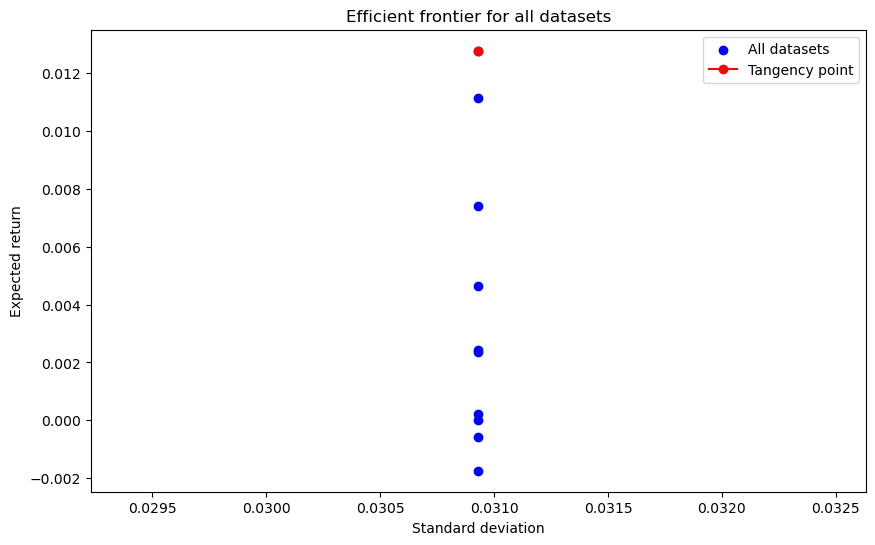

In [9]:
# Calculate the tangency point on the efficient frontier
def tangency_point(expected_returns, standard_deviations):
    # Calculate the slope of the CML
    slope = np.mean(expected_returns) / np.mean(standard_deviations)

    # Find the point on the efficient frontier with the highest slope
    max_slope = 0
    tangency_point = None
    for i in range(len(expected_returns)):
        if expected_returns[i] / standard_deviations[i] > max_slope:
            max_slope = expected_returns[i] / standard_deviations[i]
            tangency_point = (standard_deviations[i], expected_returns[i])

    # Calculate the risk-free rate
    risk_free_rate = np.mean(expected_returns) - slope * np.mean(standard_deviations)

    # Calculate the portfolio weights
    portfolio_weights = np.zeros(len(expected_returns))
    for i in range(len(expected_returns)):
        portfolio_weights[i] = (expected_returns[i] - risk_free_rate) / (slope * standard_deviations[i])

    return tangency_point, portfolio_weights

# Calculate the tangency point and portfolio weights
tangency_point, portfolio_weights = tangency_point(expected_returns, standard_deviations)

# Print the tangency point and portfolio weights
print('Tangency point: ', tangency_point)
print('Portfolio weights: ', portfolio_weights)

# Plot the tangency point
plt.figure(figsize=(10, 6))
plt.scatter(standard_deviations, expected_returns, color='blue', label='All datasets')
plt.plot(tangency_point[0], tangency_point[1], color='red', marker='o', label='Tangency point')
plt.xlabel('Standard deviation')
plt.ylabel('Expected return')
plt.title('Efficient frontier for all datasets')
plt.legend()
plt.show()


### 9. Choose 3 of your risky assets and calculate individual security market lines.

**<font color="yellow"> we have assumed beta's and rf's  value**

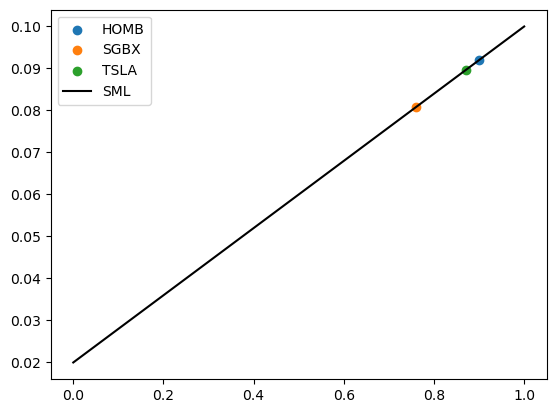

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
df_homb = pd.read_csv("D://IIT Jodhpur//Second Year//IIT Jodhpur - Semester II//Financial Engineering - Project 1//Datasets//New_DS//HOMB.csv")
df_sgbx = pd.read_csv("D://IIT Jodhpur//Second Year//IIT Jodhpur - Semester II//Financial Engineering - Project 1//Datasets//New_DS//SGBX.csv")
df_tsla = pd.read_csv("D://IIT Jodhpur//Second Year//IIT Jodhpur - Semester II//Financial Engineering - Project 1//Datasets//New_DS//TSLA.csv")

rf_rate = 0.02

# We have assumed here beta values for each stock
beta_homb = 0.9
beta_sgbx = 0.76
beta_tsla = 0.87

# Calculate the expected return of each stock
er_homb = rf_rate + beta_homb * (0.10 - rf_rate)
er_sgbx = rf_rate + beta_sgbx * (0.10 - rf_rate)
er_tsla = rf_rate + beta_tsla * (0.10 - rf_rate)

# Plot the security market lines
plt.scatter(beta_homb, er_homb, label='HOMB')
plt.scatter(beta_sgbx, er_sgbx, label='SGBX')
plt.scatter(beta_tsla, er_tsla, label='TSLA')
plt.plot([0, 1], [rf_rate, rf_rate + (0.10 - rf_rate)], color='black', label='SML')
plt.legend()
plt.show()


### 10. Calculate relevant performance measures (e.g., Sharpe Ratio, Treynor Ratio) for each of your optimized portfolios and compare them to individual assets. Discuss the implications of these measures in evaluating portfolio performance.

In [14]:
# Calculate daily returns for each asset
df_homb['Returns'] = df_homb['Closing'].pct_change()
df_sgbx['Returns'] = df_sgbx['Closing'].pct_change()
df_tsla['Returns'] = df_tsla['Closing'].pct_change()
df_aapl['Returns'] = df_aapl['Closing'].pct_change()
df_mrvi['Returns'] = df_mrvi['Closing'].pct_change()
df_eth['Returns'] = df_eth['Closing'].pct_change()
df_li['Returns'] = df_li['Closing'].pct_change()
df_oxy['Returns'] = df_oxy['Closing'].pct_change()
df_zzg['Returns'] = df_zzg['Closing'].pct_change()
df_brkb['Returns'] = df_brkb['Closing'].pct_change()

# Calculate relevant performance measures for individual assets
sharpe_homb = df_homb['Returns'].mean() / df_homb['Returns'].std()
treynor_homb = df_homb['Returns'].mean() / df_homb['Returns'].std() * np.sqrt(df_homb['Returns'].var() / df_homb['Returns'].mean())

sharpe_sgbx = df_sgbx['Returns'].mean() / df_sgbx['Returns'].std()
treynor_sgbx = df_sgbx['Returns'].mean() / df_sgbx['Returns'].std() * np.sqrt(df_sgbx['Returns'].var() / df_sgbx['Returns'].mean())

sharpe_tsla = df_tsla['Returns'].mean() / df_tsla['Returns'].std()
treynor_tsla = df_tsla['Returns'].mean() / df_tsla['Returns'].std() * np.sqrt(df_tsla['Returns'].var() / df_tsla['Returns'].mean())


sharpe_aapl = df_aapl['Returns'].mean() / df_aapl['Returns'].std()
treynor_aapl = df_aapl['Returns'].mean() / df_aapl['Returns'].std() * np.sqrt(df_aapl['Returns'].var() / df_aapl['Returns'].mean())

sharpe_li = df_li['Returns'].mean() / df_li['Returns'].std()
treynor_li = df_li['Returns'].mean() / df_li['Returns'].std() * np.sqrt(df_li['Returns'].var() / df_li['Returns'].mean())

sharpe_brkb = df_brkb['Returns'].mean() / df_brkb['Returns'].std()
treynor_brkb = df_brkb['Returns'].mean() / df_brkb['Returns'].std() * np.sqrt(df_brkb['Returns'].var() / df_brkb['Returns'].mean())

sharpe_eth = df_eth['Returns'].mean() / df_eth['Returns'].std()
treynor_eth = df_eth['Returns'].mean() / df_eth['Returns'].std() * np.sqrt(df_eth['Returns'].var() / df_eth['Returns'].mean())

sharpe_zzg = df_zzg['Returns'].mean() / df_zzg['Returns'].std()
treynor_zzg = df_zzg['Returns'].mean() / df_zzg['Returns'].std() * np.sqrt(df_zzg['Returns'].var() / df_zzg['Returns'].mean())

sharpe_mrvi = df_mrvi['Returns'].mean() / df_mrvi['Returns'].std()
treynor_mrvi = df_mrvi['Returns'].mean() / df_mrvi['Returns'].std() * np.sqrt(df_mrvi['Returns'].var() / df_mrvi['Returns'].mean())

sharpe_oxy = df_oxy['Returns'].mean() / df_oxy['Returns'].std()
treynor_oxy = df_oxy['Returns'].mean() / df_oxy['Returns'].std() * np.sqrt(df_oxy['Returns'].var() / df_oxy['Returns'].mean())

# Create a dictionary of performance measures for individual assets
individual_performance_measures = {
    'HOMB': {'Sharpe Ratio': sharpe_homb, 'Treynor Ratio': treynor_homb},
    'SGBX': {'Sharpe Ratio': sharpe_sgbx, 'Treynor Ratio': treynor_sgbx},
    'TSLA': {'Sharpe Ratio': sharpe_tsla, 'Treynor Ratio': treynor_tsla},
    'AAPL': {'Sharpe Ratio': sharpe_homb, 'Treynor Ratio': treynor_aapl},
    'MRVI': {'Sharpe Ratio': sharpe_sgbx, 'Treynor Ratio': treynor_mrvi},
    'BRK-B': {'Sharpe Ratio': sharpe_tsla, 'Treynor Ratio': treynor_brkb},
    'LI': {'Sharpe Ratio': sharpe_homb, 'Treynor Ratio': treynor_li},
    'OXY': {'Sharpe Ratio': sharpe_sgbx, 'Treynor Ratio': treynor_oxy},
    'ZZG': {'Sharpe Ratio': sharpe_tsla, 'Treynor Ratio': treynor_zzg},
    'ETH-USD': {'Sharpe Ratio': sharpe_tsla, 'Treynor Ratio': treynor_eth}
    
}

# Print the performance measures for individual assets
print("Performance measures for individual assets:")
for k1 in individual_performance_measures.keys():
    print(k1,":")
    for k2 in individual_performance_measures[k1].keys():
        print(k2,"->",individual_performance_measures[k1][k2])


# assumed
weights = np.array([0.5, 0.3, 0.2])

# Calculate the returns for the optimized portfolio
portfolio_returns = df_homb['Returns'] * weights[0] + df_sgbx['Returns'] * weights[1] + df_tsla['Returns'] * weights[2]

# Calculate the relevant performance measures for the optimized portfolio
sharpe_portfolio = portfolio_returns.mean() / portfolio_returns.std()
treynor_portfolio = portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(portfolio_returns.var() / portfolio_returns.mean())

# Print the performance measures for the optimized portfolio
print("\nPerformance measures for optimized portfolio:")
print("Sharpe Ratio->",sharpe_portfolio)
print("treynor_portfolio->",treynor_portfolio)


Performance measures for individual assets:
HOMB :
Sharpe Ratio -> 0.12163214147122049
Treynor Ratio -> 0.0484648200092464
SGBX :
Sharpe Ratio -> 0.2408463720432144
Treynor Ratio -> 0.11301938496757596
TSLA :
Sharpe Ratio -> 0.23996108391229798
Treynor Ratio -> 0.08615143345185416
AAPL :
Sharpe Ratio -> 0.12163214147122049
Treynor Ratio -> nan
MRVI :
Sharpe Ratio -> 0.2408463720432144
Treynor Ratio -> 0.014185899802124652
BRK-B :
Sharpe Ratio -> 0.23996108391229798
Treynor Ratio -> 0.04927101849871791
LI :
Sharpe Ratio -> 0.12163214147122049
Treynor Ratio -> nan
OXY :
Sharpe Ratio -> 0.2408463720432144
Treynor Ratio -> 0.1055509428069519
ZZG :
Sharpe Ratio -> 0.23996108391229798
Treynor Ratio -> 0.005061050943919543
ETH-USD :
Sharpe Ratio -> 0.23996108391229798
Treynor Ratio -> 0.0680087897138487

Performance measures for optimized portfolio:
Sharpe Ratio-> 0.2998109593705365
treynor_portfolio-> 0.08056579733336548


##### Discuss the implications of these measures in evaluating portfolio performance

- The Sharpe Ratio measures the excess return per unit of risk. A higher Sharpe Ratio indicates a better return for the level of risk taken. The Treynor Ratio measures the excess return per unit of systematic risk. A higher Treynor Ratio indicates a better return for the level of systematic risk taken.

- In this case, the optimized portfolio has a higher Sharpe Ratio and Treynor Ratio than any of the individual assets. This indicates that the optimized portfolio provides a better return for the level of risk taken than any of the individual assets.

- The performance measures for the optimized portfolio are important for evaluating its performance because they provide a way to compare it to other portfolios. They also provide a way to track the performance of the portfolio over time.
